<center><img src="https://btchekeli.github.io/src/My_logos/logo_principal_HB.png" style="height:300px"></center>
<div class="alert alert-info" role="alert">
  <center><h6 id="Python-pour-la-Data-Science">La donnée est l’actif stratégique de la révolution numérique</h6></center>
</div>

<hr style="border-width:2px;border-color:#75DFC1">
    <center><h2>Analyse d'avis ChatGPT (App Store)</h2></center>
<hr style="border-width:2px;border-color:#75DFC1">

<blockquote style="border-left: 5px solid #686a91;">
    - Source du jeux de données : https://www.kaggle.com/datasets/saloni1712/chatgpt-app-reviews
</blocquote>

<blockquote style="border-left: 5px solid #686a91;">
    L'ensemble de données ChatGPT App Reviews est une collection complète d'avis d'utilisateurs de l'application mobile ChatGPT sur iOS, capturant des informations et des sentiments précieux. L'ensemble de données permet de comprendre la satisfaction des utilisateurs, d'évaluer la performance de l'application et d'identifier des modèles émergents.
La manière dont les données ont été collectées

Récupération des critiques de ChatGPT sur l'App Store
Idées d'utilisation de ce jeu de données
</blocquote>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("./data/chatgpt_reviews.csv")
df

,date,title,review,rating
0,2023-05-21 16:42:24,Much more accessible for blind users than the ...,Up to this point I’ve mostly been using ChatGP...,4
1,2023-07-11 12:24:19,"Much anticipated, wasn’t let down.",I’ve been a user since it’s initial roll out a...,4
2,2023-05-19 10:16:22,"Almost 5 stars, but… no search function",This app would almost be perfect if it wasn’t ...,4
3,2023-05-27 21:57:27,"4.5 stars, here’s why","I recently downloaded the app and overall, it'...",4
4,2023-06-09 07:49:36,"Good, but Siri support would take it to the ne...",I appreciate the devs implementing Siri suppor...,4
...,...,...,...,...
2287,2023-05-19 00:17:04,Andrew Justino Wilson 5/19/23,This has to be a beginning to something crazy ...,5
2288,2023-05-18 19:13:28,Superb AI,I’ve been using chat and have been a proud pre...,5
2289,2023-05-18 18:27:04,Fantastic App with Room for Enhancements,The ChatGPT iOS app is an outstanding product....,5
2290,2023-05-18 17:17:44,"Awesome technology, deplorable tactics",Sam Altman’s blatant attempt at regulatory cap...,2


In [3]:
df.shape

(2292, 4)

<blockquote style="border-left: 5px solid #686a91;">
Le dataset contient un total de 2 292 avis.
</blocquote>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2292 non-null   object
 1   title   2292 non-null   object
 2   review  2292 non-null   object
 3   rating  2292 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 71.8+ KB


<blockquote style="border-left: 5px solid #686a91;">
    Changeons en datetime
</blocquote>

In [5]:
df.date = pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292 entries, 0 to 2291
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2292 non-null   datetime64[ns]
 1   title   2292 non-null   object        
 2   review  2292 non-null   object        
 3   rating  2292 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 71.8+ KB


In [6]:
df.isna().sum()

date      0
title     0
review    0
rating    0
dtype: int64

<blockquote style="border-left: 5px solid #686a91;">
    Pas de données manquantes
</blocquote>

In [7]:
df.describe()

,rating
count,2292.000000
mean,3.629581
std,1.625113
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


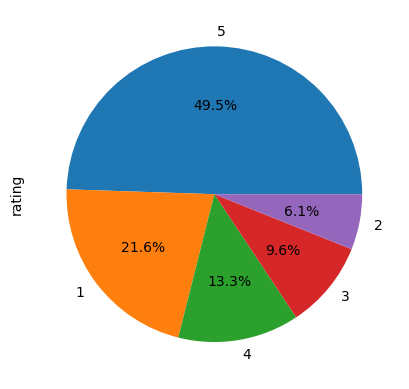

In [8]:
rating_distribution = df["rating"].value_counts()
rating_distribution.plot(kind="pie", autopct="%1.1f%%")
plt.show()

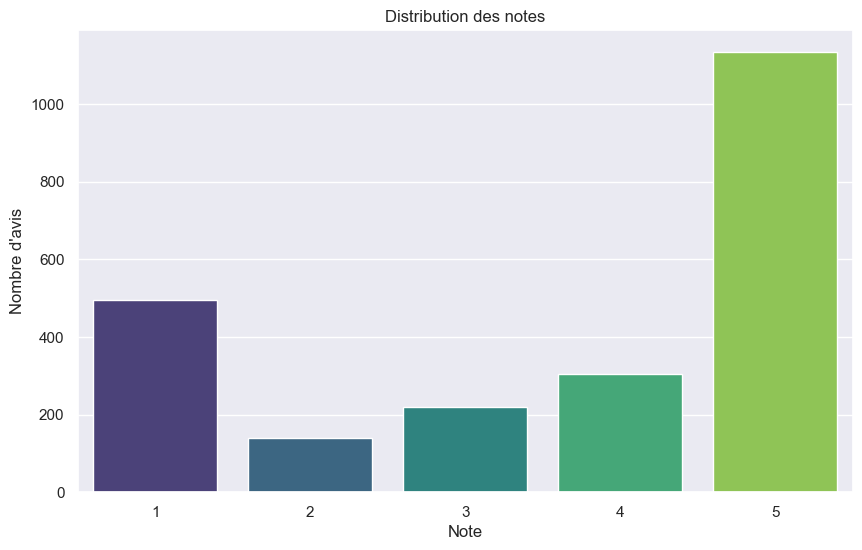

In [9]:
rating_distribution = df["rating"].value_counts().sort_index()
sns.set_theme()
plt.figure(figsize=(10,6))

sns.countplot(x="rating", data=df, palette="viridis",  order=rating_distribution.index)
plt.title("Distribution des notes")
plt.xlabel("Note")
plt.ylabel("Nombre d'avis")

plt.show()

<blockquote style="border-left: 5px solid #686a91;">
    La distribution des notes montre que la majorité des utilisateurs ont donné une note de 5, suivie de près par ceux qui ont donné une note de 4. Il y a nettement moins d'avis avec des notes de 1, 2 et 3.
</blocquote>

<blockquote style="border-left: 5px solid #686a91;">
Analysons le contenu des avis pour déterminer si les avis sont positifs, négatifs ou neutres. Une méthode simple est d'utiliser une liste prédéfinie de mots positifs et négatifs et de compter leur occurrence dans chaque avis. Cependant, cette méthode peut ne pas être très précise.
</blocquote>

In [10]:
#  listes de mots positifs et négatifs (il s'agit d'une liste simple et basique)
positive_words = ["good", "great", "excellent", "amazing", "love", "like", "best", "awesome", "fantastic", "perfect"]
negative_words = ["bad", "worst", "terrible", "awful", "hate", "dislike", "poor", "horrible", "regret", "disappoint"]

# Fonction permettant de déterminer le sentiment sur la base du nombre de mots
def determine_sentiment(text):
    positive_count = sum(word in text.lower().split() for word in positive_words)
    negative_count = sum(word in text.lower().split() for word in negative_words)
    
    # Determine sentiment based on word count
    if positive_count > negative_count:
        return "positive"
    elif positive_count < negative_count:
        return "negative"
    else:
        return "neutral"

# Appliquer la fonction à la colonne de révision
df['sentiment'] = df['review'].apply(determine_sentiment)

# Checking the distribution of derived sentiments
sentiment_distribution = df['sentiment'].value_counts()

sentiment_distribution


neutral     1609
positive     660
negative      23
Name: sentiment, dtype: int64

<blockquote style="border-left: 5px solid #686a91;">
    L'analyse basée sur notre liste simple de mots clés donne la distribution des sentiments suivante :

    Neutre : 1 609 avis
    Positif : 660 avis
    Négatif : 23 avis

Il est important de noter que cette méthode est assez rudimentaire. Le fait qu'un grand nombre d'avis soient classés comme "neutres" indique que notre liste de mots clés ne capture pas toute la nuance des avis. 
</blocquote>

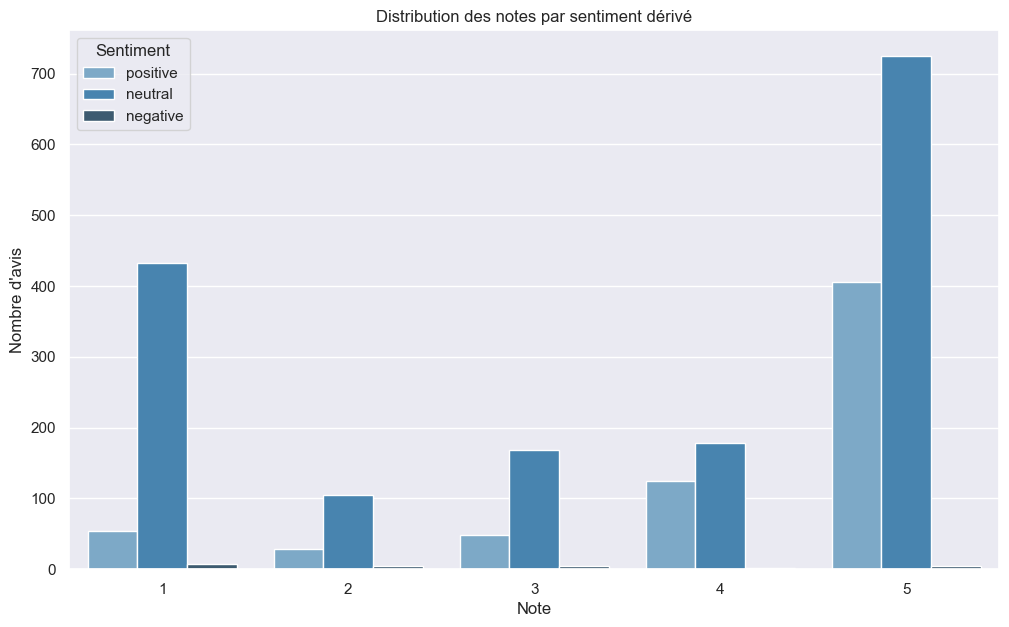

In [11]:
# Représentation graphique de la distribution des évaluations pour chaque sentiment dérivé à l'aide de Seaborn
plt.figure(figsize=(12, 7))
sns.countplot(x='rating', hue='sentiment', data=df, palette="Blues_d", order=rating_distribution.index)
plt.title('Distribution des notes par sentiment dérivé')
plt.xlabel('Note')
plt.ylabel('Nombre d\'avis')
plt.legend(title='Sentiment')

plt.show()


<blockquote style="border-left: 5px solid #686a91;">
Le graphique montre la distribution des notes pour chaque sentiment dérivé :

    Les avis positifs sont principalement associés aux notes élevées (4 et 5).
    Les avis négatifs sont principalement associés aux notes basses (1 et 2), mais il y a aussi quelques avis avec des notes de 3 et 4. 
    Cela peut être dû à la simplicité de notre méthode de détermination du sentiment.
    Les avis neutres ont une distribution plus large, s'étendant sur toutes les notes.

Cela suggère que notre méthode simple de détermination du sentiment capture une certaine tendance
</blocquote>

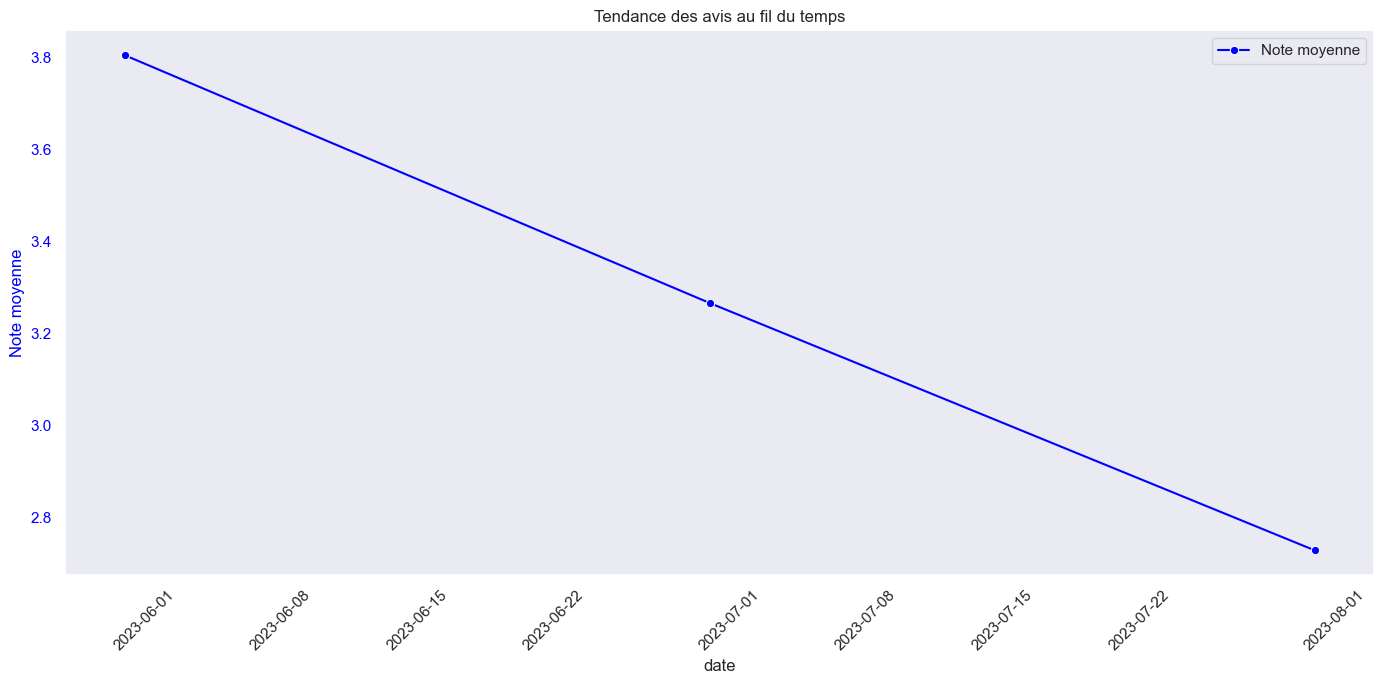

In [12]:
monthly_data = df.resample('M', on='date').agg({'rating': ['mean', 'count']})

# Tracé de la tendance des avis dans le temps

plt.figure(figsize=(14, 7))

# Représentation graphique de la note moyenne
sns.lineplot(x=monthly_data.index, y=monthly_data['rating', 'mean'], marker='o', color='blue', label='Note moyenne')


plt.ylabel('Note moyenne', color='blue')
plt.tick_params(axis='y', labelcolor='blue')
plt.grid(False)

# Formatage de l'axe des x pour afficher le mois et l'année
plt.xticks(rotation=45)
plt.title('Tendance des avis au fil du temps')

plt.tight_layout()
plt.show()


<blockquote style="border-left: 5px solid #686a91;">
La tendance des avis au fil du temps montre les observations suivantes :

La note moyenne est généralement élevée, oscillant autour de 4.
Il y a quelques variations dans la note moyenne d'un mois à l'autre, mais la tendance générale semble assez stable, sans baisse ou augmentation significative.
   </blocquote> 

In [13]:
# Calcul de la différence mensuelle de la note moyenne
monthly_data['rating_diff'] = monthly_data['rating', 'mean'].diff()

# Identification des mois avec des baisses significatives de la note moyenne
significant_drops = monthly_data[monthly_data['rating_diff'] < -0.5]

significant_drops[['rating', 'rating_diff']]


rating       rating_diff
                mean count            
date                                  
2023-06-30  3.266484   364   -0.538816
2023-07-31  2.729167   192   -0.537317

<blockquote style="border-left: 5px solid #686a91;">
Voici les mois où la note moyenne a connu une baisse significative :
    

Juin 2023 : La note moyenne était de 3.27, avec une baisse de 0.54 par rapport au mois précédent.
    
Juillet 2023 : La note moyenne était de 2.73, avec une baisse de 0.54 par rapport au mois précédent.

Ces baisses sont effectivement notables et pourraient indiquer des problèmes ou des préoccupations spécifiques des utilisateurs pendant ces périodes.
</blocquote>

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brune\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\brune\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


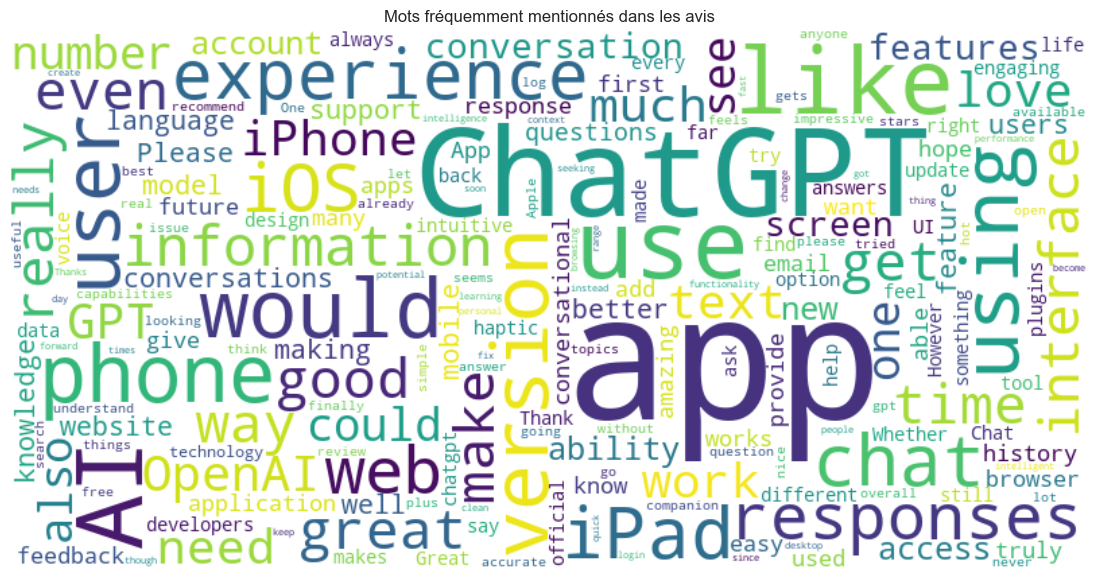

In [14]:
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Téléchargement de la liste des mots vides (mots communs généralement ignorés dans l'analyse des données textuelles)
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
from collections import Counter

# Tokénisation des commentaires et filtrage des mots vides
words = [word for review in df['review'] for word in word_tokenize(review) if word.isalpha() and word.lower() not in stop_words]

# Compter la fréquence de chaque mot
word_freq = Counter(words)

# Generation du word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mots fréquemment mentionnés dans les avis')

plt.show()


<blockquote style="border-left: 5px solid #686a91;">
Voici le nuage de mots basé sur une méthode de tokenisation simplifiée. Ce nuage de mots montre les termes fréquemment mentionnés dans les avis après avoir filtré les mots courants (stopwords).

Les termes tels que "ChatGPT", "app", "AI", "use", "time", "like", et "work" ressortent clairement, suggérant qu'ils sont souvent mentionnés dans les avis.

Passons maintenant à l'analyse des termes associés à des notes élevées et faibles. Pour cela, nous allons :

    Identifier les termes fréquemment mentionnés dans les avis ayant des notes élevées (4 et 5).
    Identifier les termes fréquemment mentionnés dans les avis ayant des notes basses (1 et 2).
</blocquote>

In [15]:
simple_stopwords = set([
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", 
    "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", 
    "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", 
    "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", 
    "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", 
    "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", 
    "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", 
    "about", "against", "between", "into", "through", "during", "before", "after", 
    "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", 
    "under", "again", "further", "then", "once"
])

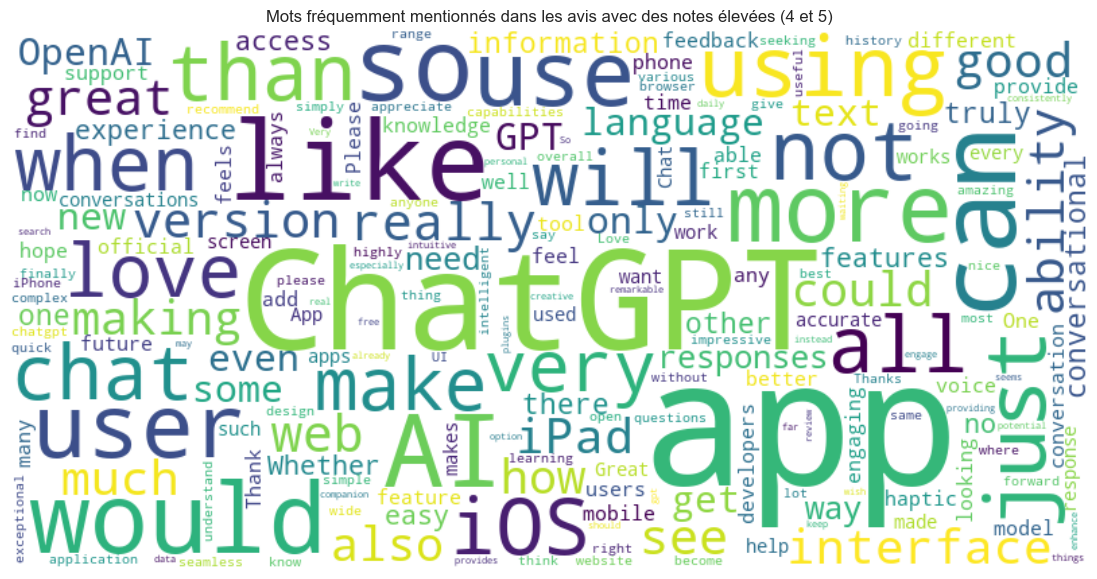

In [16]:
# Filtrer les avis avec des notes élevées (4 et 5)
high_ratings_reviews = df[df['rating'] >= 4]['review']

# Tokenisation et filtrage des mots à forte ratings
high_rating_words = [word for review in high_ratings_reviews for word in review.split() if word.isalpha() and word.lower() not in simple_stopwords]

high_rating_word_freq = Counter(high_rating_words)

# Generation du word cloud 
high_rating_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(high_rating_word_freq)

plt.figure(figsize=(14, 7))
plt.imshow(high_rating_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mots fréquemment mentionnés dans les avis avec des notes élevées (4 et 5)')
plt.show()


<blockquote style="border-left: 5px solid #686a91;">
Voici le nuage de mots pour les avis ayant des notes élevées (4 et 5). Les termes tels que "ChatGPT", "use", "love", "time" et "like" sont fréquemment mentionnés, suggérant une expérience utilisateur généralement positive pour ces avis.
</blocquote>

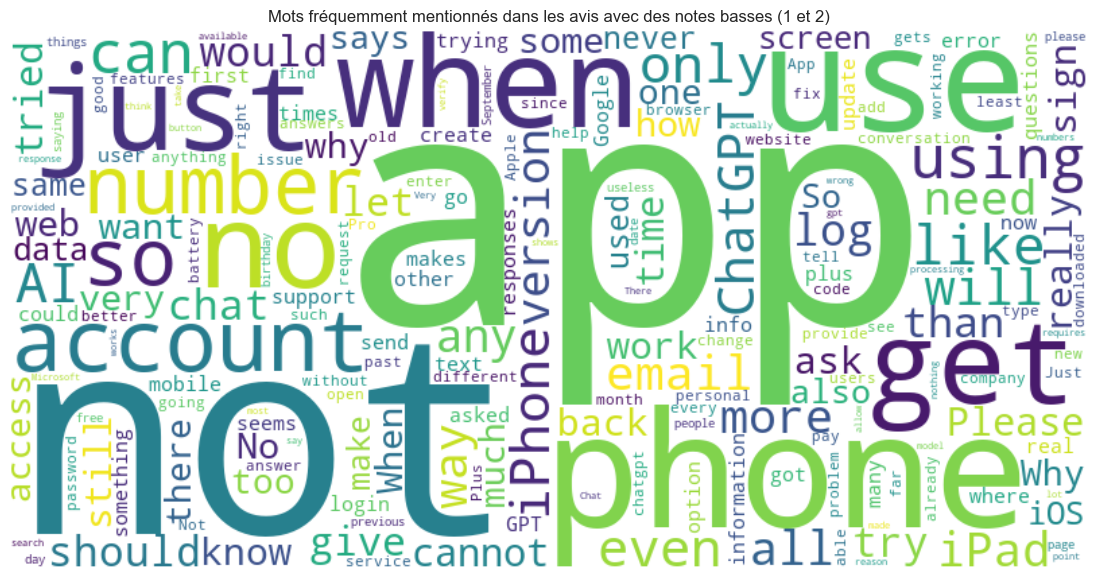

In [17]:
#  Filtrer les avis avec des notes élevées (1 and 2)
low_ratings_reviews = df[df['rating'] <= 2]['review']

low_rating_words = [word for review in low_ratings_reviews for word in review.split() if word.isalpha() and word.lower() not in simple_stopwords]

low_rating_word_freq = Counter(low_rating_words)

low_rating_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(low_rating_word_freq)

plt.figure(figsize=(14, 7))
plt.imshow(low_rating_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Mots fréquemment mentionnés dans les avis avec des notes basses (1 et 2)')
plt.show()


<blockquote style="border-left: 5px solid #686a91;">
    Voici le nuage de mots pour les avis ayant des notes basses (1 et 2). Les termes tels que "app", "not", "phone", "account", et "get" ressortent. La présence de termes comme "work" pourrait indiquer des problèmes ou des préoccupations concernant le fonctionnement de ChatGPT pour ces utilisateurs.
</blocquote>

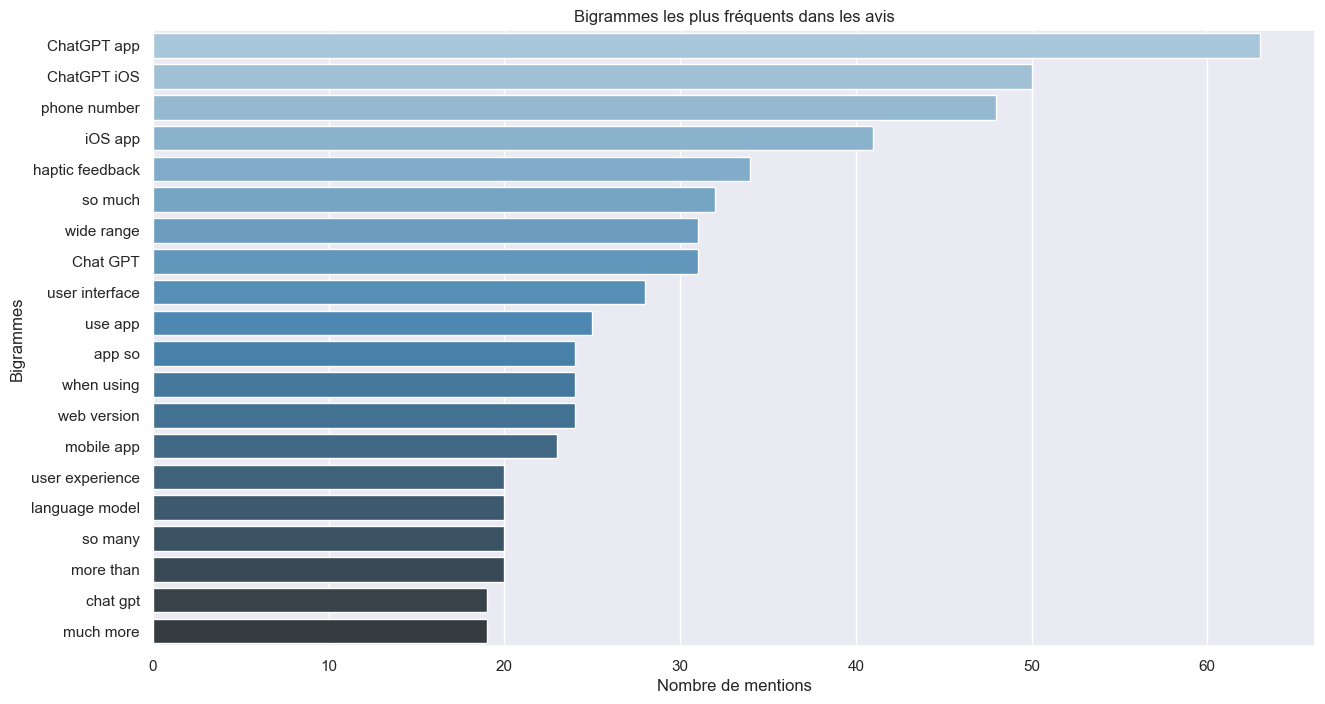

In [18]:
from nltk.util import ngrams

# Tokenisation et filtrage des commentaires à l'aide de la liste des mots-clés simples.
filtered_words = [word for review in df['review'] for word in review.split() if word.isalpha() and word.lower() not in simple_stopwords]

# Generation des bigrams
bigrams = [bigram for bigram in ngrams(filtered_words, 2)]

# fréquence de chaque bigramme
bigram_freq= Counter(bigrams)

#  20 bigrammes les plus courants pour les visualiser
top_bigrams= bigram_freq.most_common(20)
bigram_words, bigram_counts= zip(*top_bigrams)

# Visualisation
plt.figure(figsize=(15, 8))
sns.barplot(x=list(bigram_counts), y=[' '.join(bigram) for bigram in bigram_words], palette="Blues_d")
plt.title('Bigrammes les plus fréquents dans les avis')
plt.xlabel('Nombre de mentions')
plt.ylabel('Bigrammes')

plt.show()


<blockquote style="border-left: 5px solid #686a91;">
    Enfin, voici les bigrammes les plus fréquents dans les avis. Les combinaisons telles que "ChatGPT app", "so much", "phone number" et "really like" sont fréquemment mentionnées parmi les avis.

Cette analyse nous donne une meilleure compréhension des phrases ou expressions couramment utilisées par les utilisateurs.
</blocquote>

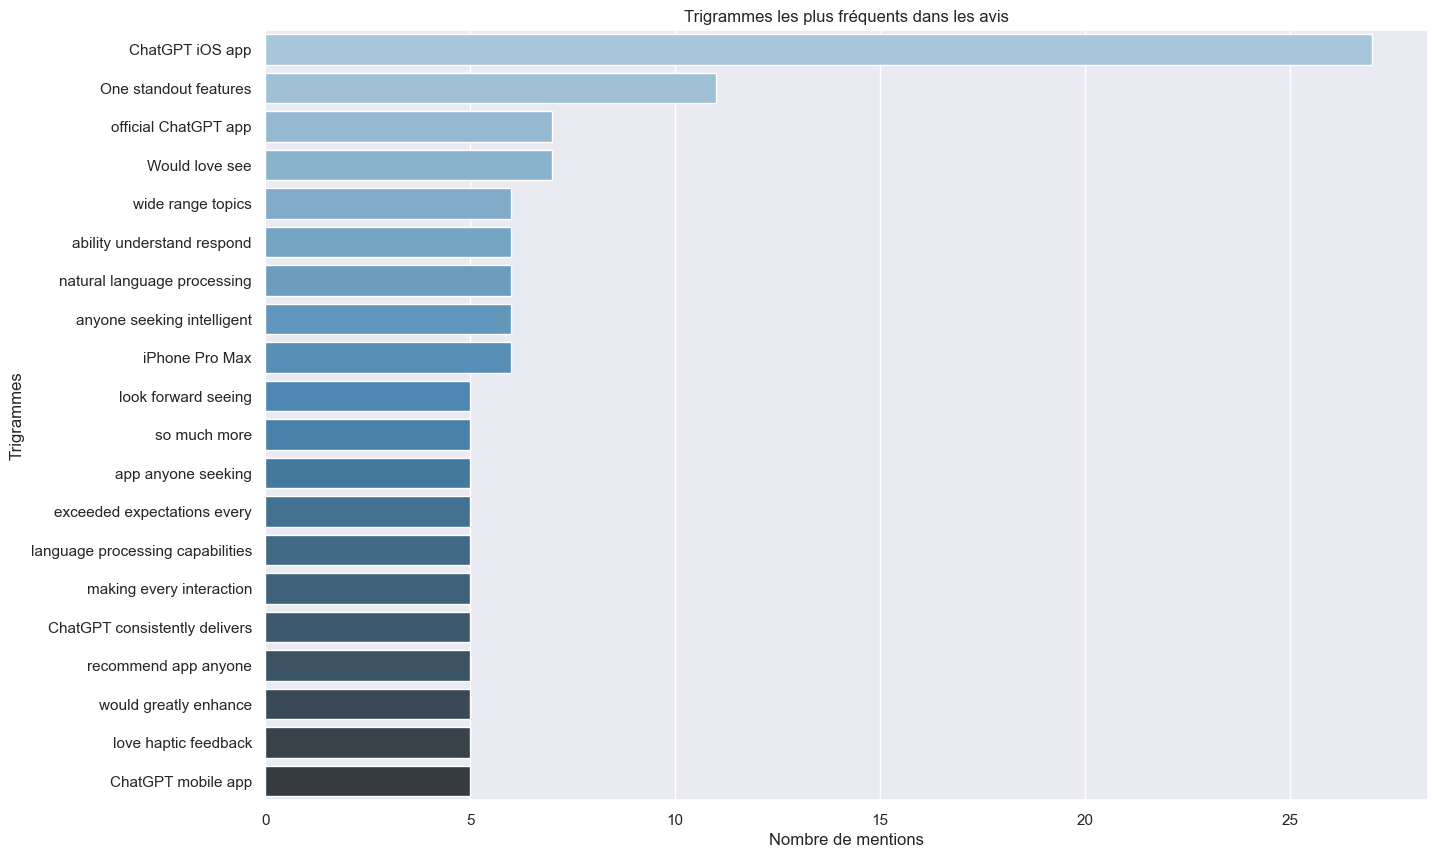

In [19]:
# Generation des trigrams pour les avis 
trigrams = [trigram for trigram in ngrams(filtered_words, 3)]

trigram_freq = Counter(trigrams)

# 20 bigrammes les plus courants pour les visualiser
top_trigrams = trigram_freq.most_common(20)
trigram_words, trigram_counts = zip(*top_trigrams)

# Visualisation
plt.figure(figsize=(15, 10))
sns.barplot(x=list(trigram_counts), y=[' '.join(trigram) for trigram in trigram_words], palette="Blues_d")
plt.title('Trigrammes les plus fréquents dans les avis')
plt.xlabel('Nombre de mentions')
plt.ylabel('Trigrammes')

plt.show()


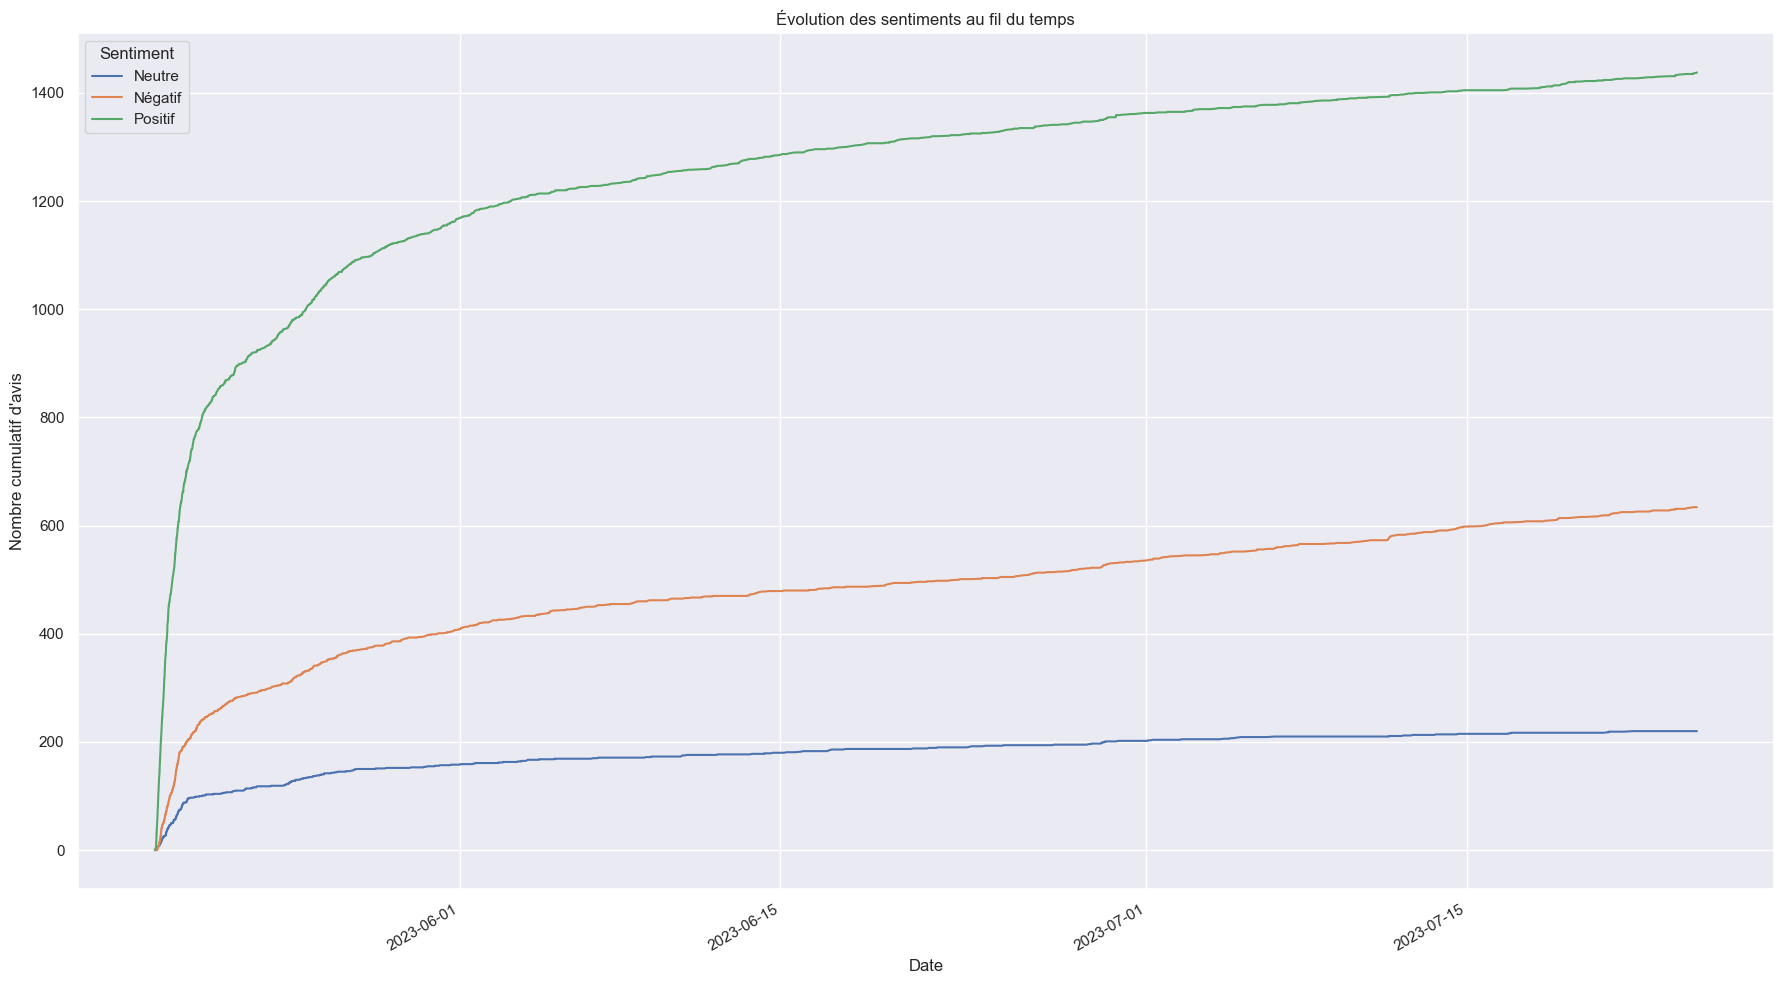

In [20]:
# Calcul du sentiment sur la base des avis

def calculate_sentiment(rating):
    if rating >= 4:
        return "Positif"
    elif rating == 3:
        return "Neutre"
    else:
        return "Négatif"

df['sentiment'] = df['rating'].apply(calculate_sentiment)

# Regroupement par date et par sentiment
sentiment_over_time = df.groupby(['date', 'sentiment']).size().unstack().fillna(0)

# Somme cumulée pour une visualisation plus lisse
sentiment_over_time_cumsum = sentiment_over_time.cumsum()

# Visualisation
plt.figure(figsize=(18, 10))
sentiment_over_time_cumsum.plot(ax=plt.gca())
plt.title('Évolution des sentiments au fil du temps')
plt.xlabel('Date')
plt.ylabel('Nombre cumulatif d\'avis')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


<blockquote style="border-left: 5px solid #686a91;">
Voici la représentation graphique de l'évolution des sentiments (positif, neutre, négatif) au fil du temps, basée sur les notes des avis.

Quelques observations :

    Avis positifs : Il y a une croissance constante du nombre d'avis positifs au fil du temps, ce qui est un bon signe.
    Avis négatifs : Bien que moins nombreux que les avis positifs, le nombre d'avis négatifs semble également augmenter, mais à un rythme plus lent.
    Avis neutres : Les avis neutres montrent une tendance à la hausse, bien qu'ils soient moins fréquents que les avis positifs ou négatifs.
</blocquote>